In [1]:
import numpy as np
import tensorflow as tf
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
np.random.seed(0)
tf.set_random_seed(1234)

In [2]:
n_data = 300
X, y = datasets.make_moons(n_data, noise=0.3)

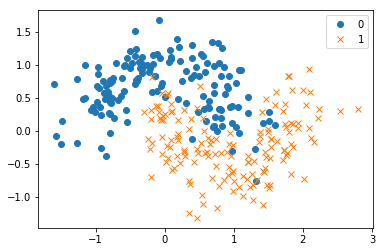

In [3]:
plt.plot(X[np.where(y==0)[0],0], X[np.where(y==0)[0],1], 'o')
plt.plot(X[np.where(y==1)[0],0], X[np.where(y==1)[0],1], 'x')
plt.legend(['0', '1'], loc=0)
plt.show()

In [4]:
Y = y.reshape(n_data, 1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8)

In [5]:
n_hidden = 2

x = tf.placeholder(tf.float32, shape=[None, 2])
t = tf.placeholder(tf.float32, shape=[None, 1])

w1 = tf.Variable(tf.truncated_normal([2, n_hidden]))
b1 = tf.Variable(tf.zeros([n_hidden]))
h = tf.nn.sigmoid(tf.nn.xw_plus_b(x, w1, b1))

w2 = tf.Variable(tf.truncated_normal([n_hidden, 1]))
b2 = tf.Variable(tf.zeros([1]))
y = tf.nn.sigmoid(tf.nn.xw_plus_b(h, w2, b2))

cross_entropy = - tf.reduce_sum(t * tf.log(y) + (1 - t) * tf.log(1 - y))
train_step = tf.train.GradientDescentOptimizer(0.05).minimize(cross_entropy)
correct_prediction = tf.equal(tf.to_float(tf.greater(y, 0.5)), t)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [6]:
batch_size = 20
n_batchs = n_data//batch_size

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [7]:
for epoch in range(500):
    X_, Y_ = shuffle(X_train, Y_train)
    
    for i in range(n_batchs):
        start = i * batch_size
        end = start + batch_size
        
        sess.run(train_step, feed_dict = {x: X_[start:end], t: Y_[start:end]})

In [8]:
accuracy_rate = accuracy.eval(session=sess, feed_dict={x:X_test, t:Y_test})
print('accuracy : ', accuracy_rate)

accuracy :  0.9166667
